<a href="https://colab.research.google.com/github/ShrutiBaviskar19/HOUSE-PRICE-PREDICTION/blob/main/Pneumonia_detection_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pneumonia detection

In [1]:
!pip install --upgrade gradio



In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import gradio as gr

In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28) / 255.0        #Flattens 28×28 images into 784 features.
x_test = x_test.reshape(-1, 28*28) / 255.0          #Normalizes pixel values from 0–255 to 0–1 for better training performance.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Convert to fake binary classification: Even=0 (0,2,4,6,8) , Odd=1 (1,3,5,7,9)
y_train_binary = y_train % 2
y_test_binary = y_test % 2

In [5]:
# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28*28,)),            # Input: 784 features (flattened image)
    tf.keras.layers.Dense(128, activation='relu'),    # Dense layers: Fully connected layers with ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),     #Output: 2 neurons with softmax for binary classification
    tf.keras.layers.Dense(2, activation='softmax')  # Binary: Normal, Pneumonia
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train model and store history
history = model.fit(x_train, y_train_binary, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9339 - loss: 0.1645 - val_accuracy: 0.9812 - val_loss: 0.0529
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9819 - loss: 0.0494 - val_accuracy: 0.9827 - val_loss: 0.0553
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9877 - loss: 0.0355 - val_accuracy: 0.9847 - val_loss: 0.0498
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9902 - loss: 0.0280 - val_accuracy: 0.9853 - val_loss: 0.0462
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9926 - loss: 0.0207 - val_accuracy: 0.9857 - val_loss: 0.0473


In [7]:
# Plot accuracy line chart
def plot_accuracy_line(history, test_acc):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_acc, label='Train acc', marker='o')
    plt.plot(epochs, val_acc, label='Val acc', marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.figtext(0.5, -0.05, f"Test Accuracy: {test_acc:.4f}", wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()


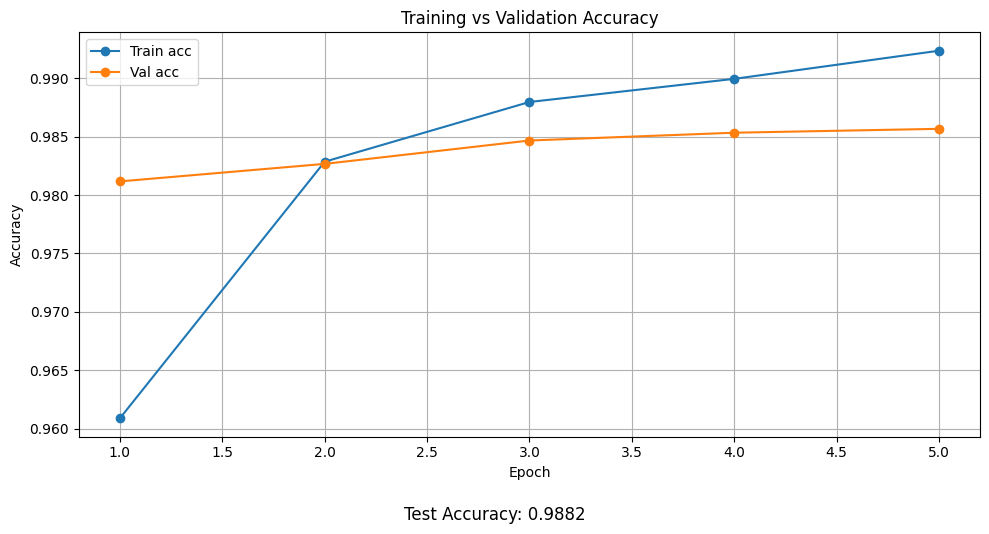

In [8]:
# Evaluate and show test accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test_binary, verbose=0)
plot_accuracy_line(history, test_accuracy)

In [9]:
# Gradio prediction function
def preprocess_image(image):
    image = image.convert('L').resize((28, 28))  # convert to grayscale
    img_array = np.array(image) / 255.0
    if np.mean(img_array) > 0.5:
        img_array = 1 - img_array  # invert if white bg
    return img_array.flatten().reshape(1, 28*28)

def predict_disease(image):
    if image is None:
        return "Please upload an image."
    img = preprocess_image(image)
    pred = model.predict(img)[0]
    classes = ["Normal", "Pneumonia"]
    return {classes[i]: float(pred[i]) for i in range(2)}

In [10]:
# Gradio UI
iface = gr.Interface(
    fn=predict_disease,
    inputs=gr.Image(type='pil', label="Upload Chest X-ray Image"),
    outputs=gr.Label(num_top_classes=2),
    title="Pneumonia Detector (Demo UI)",
    description="Upload a chest X-ray image to check if it's Normal or Pneumonia (Demo – not medically accurate)."
)

iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5e0c39bb034e678d85.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
